In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
603,LP002958,1,0,0,NaN,0,3676,4301.0,172.0,360.0,1.0,0,1
604,LP002959,0,1,1,NaN,0,12000,0.0,496.0,360.0,1.0,1,1
606,LP002961,1,1,1,NaN,0,3400,2500.0,173.0,360.0,1.0,1,1
607,LP002964,1,1,2,NaN,0,3987,1411.0,157.0,360.0,1.0,0,1
608,LP002974,1,1,0,NaN,0,3232,1950.0,108.0,360.0,1.0,0,1
609,LP002978,0,0,0,NaN,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,NaN,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,NaN,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,NaN,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0,NaN,1,4583,0.0,133.0,360.0,0.0,1,0


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.shape

(614, 13)

In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df=df.dropna()

In [ ]:
#label encoding
df.replace({'Loan_Status':{'Y':1,'N':0},'Dependents':{'3+':3}},inplace=True)

In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


In [ ]:
df=df.replace(to_replace='3+',value=4)

In [ ]:
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


Data Visualization

<Axes: xlabel='Education', ylabel='count'>

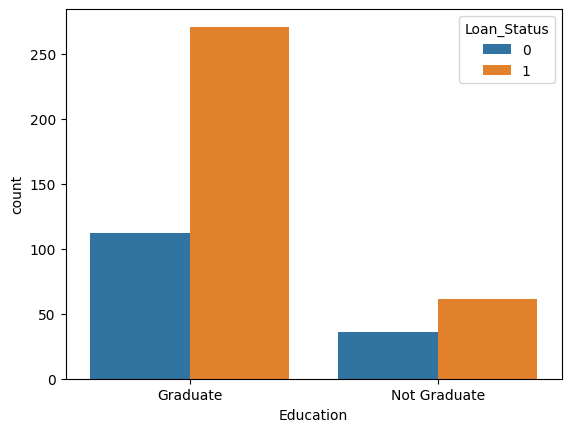

In [ ]:
#education&loan status graph
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

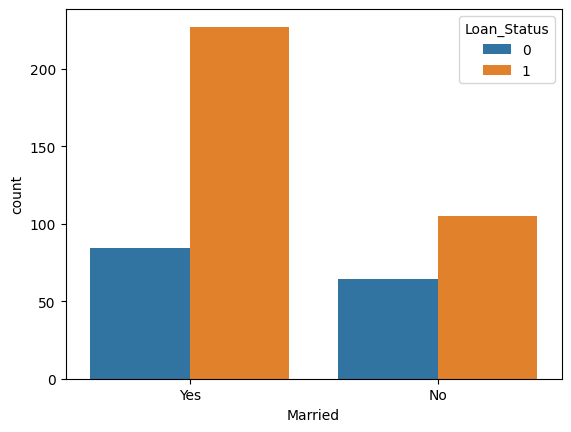

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [ ]:
#converting the categorical columns into numericals
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,NaN,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,NaN,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,NaN,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,NaN,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,NaN,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

Train,Test,Split

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model
KNN,SVM,Naive Bayes,RD,ID3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear')
nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of the column

# Fit the imputer on your training data and transform both train and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now, you can train your SVM model


KNeighborsClassifier()

In [126]:
knn.fit(X_train, Y_train)
svm.fit(X_train, Y_train)
nb.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [129]:
from sklearn.metrics import accuracy_score, classification_report
def evaluate_model(name, model, X_test, Y_test):
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(Y_test, y_pred))
    print("\nClassification Report:\n", classification_report(Y_test, y_pred))
    print("-" * 50)

# Evaluate each model
evaluate_model("KNN", knn, X_test, Y_test)
evaluate_model("SVM", svm, X_test, Y_test)
evaluate_model("Naive Bayes", nb, X_test, Y_test)
evaluate_model("Random Forest", rf, X_test, Y_test)
evaluate_model("Decision Tree", dt, X_test, Y_test)

=== KNN ===
Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.27      0.33        15
           1       0.72      0.85      0.78        33

    accuracy                           0.67        48
   macro avg       0.58      0.56      0.56        48
weighted avg       0.63      0.67      0.64        48

--------------------------------------------------
=== SVM ===
Accuracy: 0.8541666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.84      0.97      0.90        33

    accuracy                           0.85        48
   macro avg       0.87      0.78      0.81        48
weighted avg       0.86      0.85      0.84        48

--------------------------------------------------
=== Naive Bayes ===
Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-

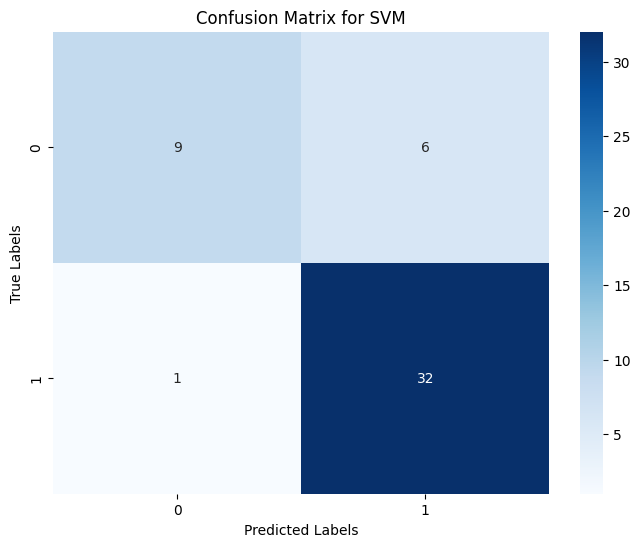

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
y_pred_svm = svm.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [136]:
print(classification_report(Y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.84      0.97      0.90        33

    accuracy                           0.85        48
   macro avg       0.87      0.78      0.81        48
weighted avg       0.86      0.85      0.84        48



In [ ]:
dataset link='https://www.kaggle.com/datasets/ninzaami/loan-predication'